# COVID Data Analysis - Day 1
Author: Abhishek Singh Jadaun

In [ ]:
!pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("covid_19_clean_complete.csv")

# Basic info
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# Dataset dimensions
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Summary statistics
print(df.describe())

# Missing values
print(df.isnull().sum())


Shape: (49068, 10)
Columns: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']
                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  

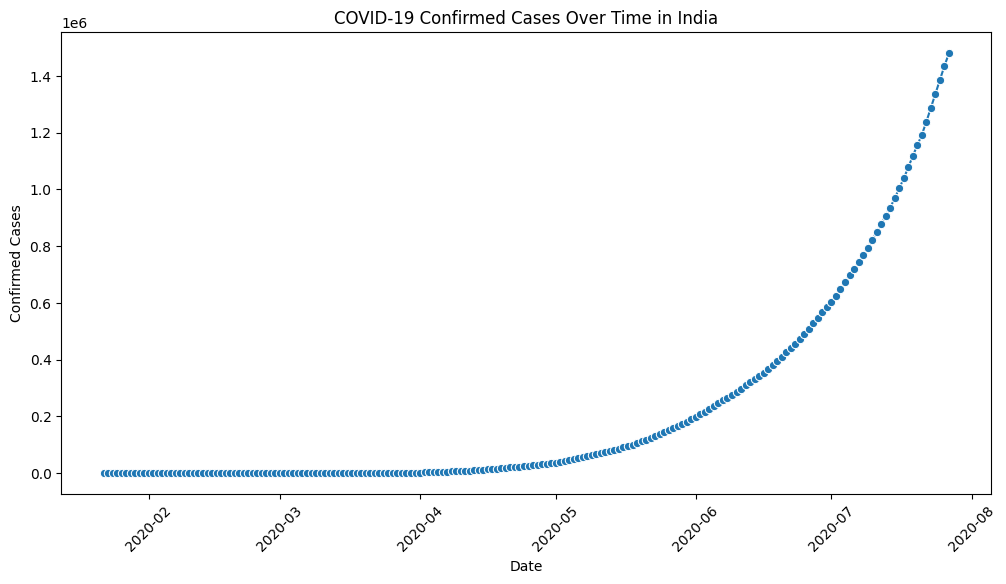

In [8]:
# Filter data for India
df["Date"] = pd.to_datetime(df["Date"])

india_data = df[df["Country/Region"] == "India"]
india_time = india_data.groupby("Date")["Confirmed"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=india_time, x="Date", y="Confirmed", marker="o")
plt.title("COVID-19 Confirmed Cases Over Time in India")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_country = df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(1)
print(top_country)

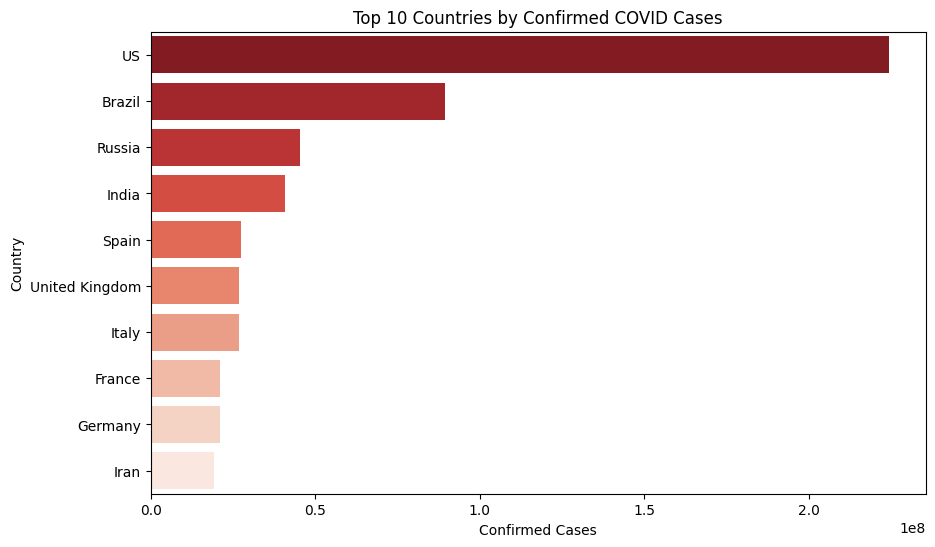

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

top_countries = df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,       # assign the y variable to hue
    palette="Reds_r",
    dodge=False,                   # keep bars aligned
    legend=False                   # turn off legend since it's redundant
)
plt.title("Top 10 Countries by Confirmed COVID Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.show()
